# Proyek Machine Learning Terapan (MLT4) - Submission 2 Sistem Rekomendasi

*   Nama : Adita Putri Puspaningrum
*   Link Dataset : https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data

# Data Collection

In [1]:
!pip install opendatasets

import opendatasets as od

od.download("https://www.kaggle.com/rohan4050/movie-recommendation-data?select=ml-latest-small")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aditaputri
Your Kaggle Key: ··········


100%|██████████| 13.1M/13.1M [00:00<00:00, 66.9MB/s]


# Data Understanding

In [98]:
import pandas as pd

links = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/links.csv')
movies = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/tags.csv')

print('Jumlah data link film : ', len(links.movieId.unique()))
print('Jumlah data film : ', len(movies.movieId.unique()))
print('Jumlah data tag film : ', len(tags.movieId.unique()))
print('Jumlah data penilaian yang diberikan pengguna : ', len(ratings.userId.unique()))
print('Jumlah data penilaian film : ', len(ratings.movieId.unique()))

Jumlah data link film :  9742
Jumlah data film :  9742
Jumlah data tag film :  1572
Jumlah data penilaian yang diberikan pengguna :  610
Jumlah data penilaian film :  9724


# Univariate Exploratory Data Analysis

In [91]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [92]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [93]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [94]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [95]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [96]:
print('Jumlah userId : ', len(ratings.userId.unique()))
print('Jumlah movieId : ', len(ratings.movieId.unique()))
print('Jumlah data rating : ', len(ratings))

Jumlah userId :  610
Jumlah movieId :  9724
Jumlah data rating :  100836


# Data Preprocessing

In [97]:
import numpy as np

# Menggabungkan seluruh movieId pada kategori movie
movie_all = np.concatenate((
    links.movieId.unique(),
    movies.movieId.unique(),
    ratings.movieId.unique(),
    tags.movieId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))

print('Jumlah seluruh data movie berdasarkan movieId: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieId:  9742


In [10]:
# Menggabungkan seluruh userId
user_all = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique(),
))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  610


In [11]:
# Menggabungkan file links, movies, tags ke dalam dataframe movie_info
movie_info = pd.concat([links, movies, tags])

# Menggabungkan dataframe ratings dengan movie_info berdasarkan nilai movieId
movie = pd.merge(ratings, movie_info , on='movieId', how='left')
movie

,userId_x,movieId,rating,timestamp_x,imdbId,tmdbId,title,genres,userId_y,tag,timestamp_y
0,1,1,4.0,964982703,114709.0,862.0,NaN,NaN,NaN,NaN,NaN
1,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN
2,1,1,4.0,964982703,NaN,NaN,NaN,NaN,336.0,pixar,1.139046e+09
3,1,1,4.0,964982703,NaN,NaN,NaN,NaN,474.0,pixar,1.137207e+09
4,1,1,4.0,964982703,NaN,NaN,NaN,NaN,567.0,fun,1.525286e+09
...,...,...,...,...,...,...,...,...,...,...,...
434880,610,168252,5.0,1493846352,NaN,NaN,NaN,NaN,567.0,gritty,1.525284e+09
434881,610,168252,5.0,1493846352,NaN,NaN,NaN,NaN,567.0,heartbreaking,1.525284e+09
434882,610,168252,5.0,1493846352,NaN,NaN,NaN,NaN,567.0,predictible plot,1.525284e+09
434883,610,170875,3.0,1493846415,4630562.0,337339.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# Cek missing value dengan fungsi isnull()
movie.isnull().sum()

userId_x            0
movieId             0
rating              0
timestamp_x         0
imdbId         334049
tmdbId         334062
title          334049
genres         334049
userId_y       201672
tag            201672
timestamp_y    201672
dtype: int64

In [15]:
movie.groupby('movieId').sum()

<ipython-input-15-906aff00c8b5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  movie.groupby('movieId').sum()


,userId_x,rating,timestamp_x,imdbId,tmdbId,userId_y,timestamp_y
movieId,,,,,,,
1,329520,4215.0,1214572277395,24662435.0,185330.0,296055.0,8.173308e+11
2,217506,2265.0,749631499932,12484670.0,972840.0,72600.0,6.296298e+11
3,58988,678.0,209062937544,5887856.0,811304.0,30056.0,1.189162e+11
4,3078,33.0,12580104096,804195.0,219499.0,0.0,0.000000e+00
5,58716,602.0,194562210376,5539009.0,581238.0,46452.0,1.114626e+11
...,...,...,...,...,...,...,...
193581,368,8.0,3074218164,5476944.0,432131.0,0.0,0.000000e+00
193583,368,7.0,3074219090,5914996.0,445030.0,0.0,0.000000e+00
193585,368,7.0,3074219610,6397426.0,479308.0,0.0,0.000000e+00


In [16]:
# Definisikan dataframe ratings ke dalam variabel all_movie_rate
all_movie_rate = ratings
all_movie_rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [17]:
# Menggabungkan all movie_rate dengan dataframe movies berdasarkan movieId
all_movie_name = pd.merge(all_movie_rate, movies[['movieId','title','genres']], on='movieId', how='left')

# Print dataframe all_movie_name
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [18]:
# Menggabungkan dataframe tags dengan all_movie_name dan memasukkannya ke dalam variabel all_movie
all_movie = pd.merge(all_movie_name, tags[['movieId','tag']], on='movieId', how='left')
all_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


# Data Preparation

In [19]:
# Mengecek missing value pada dataframe all_movie
all_movie.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          52549
dtype: int64

In [20]:
# Membersihkan missing value dengan fungsi dropna()
all_movie_clean = all_movie.dropna()
all_movie_clean

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking


In [21]:
# Mengecek kembali missing value pada variabel all_movie_clean
all_movie_clean.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
dtype: int64

In [22]:
# Mengurutkan movie berdasarkan movieId kemudian memasukkannya ke dalam variabel fix_movie
fix_movie = all_movie_clean.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,1464196374,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


In [23]:
# Mengecek berapa jumlah fix_movie
len(fix_movie.movieId.unique())

1554

In [25]:
# Mengecek berapa jumlah genre film yang unik
len(fix_movie.genres.unique())

370

In [29]:
# Membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,1005966797,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
191470,414,187595,3.5,1527977920,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


In [30]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,961594981,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,849122858,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,959625102,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,840306238,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
27632,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,1536872748,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,1532457913,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


In [31]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

1554
1554
1554


In [32]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘movie_genre’
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


# Model Development dengan Content Based Filtering

In [33]:
data = movie_new
data.sample(5)

,id,movie_name,genre
524,2243,Broadcast News (1987),Comedy|Drama|Romance
23,43,Restoration (1995),Drama
1482,111743,A Million Ways to Die in the West (2014),Comedy|Western
151,608,Fargo (1996),Comedy|Crime|Drama|Thriller
78,300,Quiz Show (1994),Drama


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(data['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [36]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1554, 24)

In [37]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

In [38]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre
# Baris diisi dengan nama film

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.movie_name
).sample(22, axis=1).sample(10, axis=0)

,listed,fantasy,crime,musical,no,thriller,noir,genres,imax,fi,...,comedy,sci,children,romance,documentary,horror,animation,war,mystery,adventure
movie_name,,,,,,,,,,,,,,,,,,,,,
Yentl (1983),0.0,0.0,0.000000,0.796484,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.00000,0.000000,0.512052,0.0,0.0,0.0,0.0,0.000000,0.000000
The Interview (2014),0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.588669,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
To Kill a Mockingbird (1962),0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
Presumed Innocent (1990),0.0,0.0,0.698508,0.000000,0.0,0.616068,0.0,0.0,0.0,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
Secondhand Lions (2003),0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.454339,0.00000,0.822956,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
Modern Times (1936),0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.578103,0.00000,0.000000,0.690993,0.0,0.0,0.0,0.0,0.000000,0.000000
Spellbound (1945),0.0,0.0,0.000000,0.000000,0.0,0.529096,0.0,0.0,0.0,0.00000,...,0.000000,0.00000,0.000000,0.497863,0.0,0.0,0.0,0.0,0.687161,0.000000
Face/Off (1997),0.0,0.0,0.581372,0.000000,0.0,0.512757,0.0,0.0,0.0,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
Intouchables (2011),0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.799743,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

In [40]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['movie_name'], columns=data['movie_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,Raising Arizona (1987),"Matrix, The (1999)",Star Wars: Episode III - Revenge of the Sith (2005),Our Hospitality (1923),"Last Picture Show, The (1971)"
movie_name,,,,,
"Doors, The (1991)",0.000000,0.000000,0.000000,0.000000,1.000000
"Winged Migration (Peuple migrateur, Le) (2001)",0.000000,0.000000,0.000000,0.000000,0.000000
Cinderella Man (2005),0.000000,0.000000,0.000000,0.000000,0.531842
Running on Empty (1988),0.000000,0.000000,0.000000,0.000000,1.000000
127 Hours (2010),0.000000,0.273530,0.331010,0.000000,0.367423
Personal Velocity (2002),0.000000,0.000000,0.000000,0.000000,1.000000
Neon Genesis Evangelion: Death & Rebirth (Shin seiki Evangelion Gekijô-ban: Shito shinsei) (1997),0.000000,0.648790,0.634364,0.000000,0.000000
Ghostbusters (a.k.a. Ghost Busters) (1984),0.359833,0.837874,0.819244,0.359833,0.000000
Ginger Snaps (2000),0.000000,0.237985,0.000000,0.000000,0.319676


In [41]:
def movie_recommendations(nama_film, similarity_data=cosine_sim_df, items=data[['movie_name', 'genre']], k=5):
    """
    Rekomendasi Film berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_film : tipe data string (str)
                Nama Film (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan film sebagai indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_film].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_film agar nama film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_film, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [55]:
data[data.movie_name.eq('Star Wars: Episode III - Revenge of the Sith (2005)')]

,id,movie_name,genre
1299,33493,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi


In [54]:
# Mendapatkan rekomendasi film yang mirip dengan Star Wars: Episode III - Revenge of the Sith
movie_recommendations('Star Wars: Episode III - Revenge of the Sith (2005)')

,movie_name,genre
0,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
1,Fantastic Four (2005),Action|Adventure|Sci-Fi
2,Serenity (2005),Action|Adventure|Sci-Fi
3,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,Superman (1978),Action|Adventure|Sci-Fi


# Model Development dengan Collaborative Filtering

# Data Understanding

In [56]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [57]:
# Membaca dataset

df = ratings
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


# Data Preparation

In [58]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [59]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [60]:
# Mapping userId ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [61]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Mengubah ratings menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum ratings
min_rating = min(df['rating'])

# Nilai maksimal ratings
max_rating = max(df['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


# Membagi Data untuk Training dan Validasi

In [62]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
67037,432,77866,4.5,1335139641,431,4730
42175,288,474,3.0,978465565,287,474
93850,599,4351,3.0,1498524542,598,2631
6187,42,2987,4.0,996262677,41,194
12229,75,1610,4.0,1158989841,74,727
...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873
54886,364,141,4.0,869443367,363,524
76820,480,6867,4.0,1179163171,479,2240
860,6,981,3.0,845556567,5,712


In [63]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


# Proses Training

In [64]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [65]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [66]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
10084/10084 [==============================] - 157s 15ms/step - loss: 0.6265 - root_mean_squared_error: 0.2221 - val_loss: 0.6127 - val_root_mean_squared_error: 0.2061
Epoch 2/100
10084/10084 [==============================] - 108s 11ms/step - loss: 0.6046 - root_mean_squared_error: 0.1982 - val_loss: 0.6091 - val_root_mean_squared_error: 0.2020
Epoch 3/100
10084/10084 [==============================] - 84s 8ms/step - loss: 0.6001 - root_mean_squared_error: 0.1930 - val_loss: 0.6079 - val_root_mean_squared_error: 0.2003
Epoch 4/100
10084/10084 [==============================] - 90s 9ms/step - loss: 0.5973 - root_mean_squared_error: 0.1896 - val_loss: 0.6068 - val_root_mean_squared_error: 0.1990
Epoch 5/100
10084/10084 [==============================] - 106s 11ms/step - loss: 0.5956 - root_mean_squared_error: 0.1875 - val_loss: 0.6070 - val_root_mean_squared_error: 0.1990
Epoch 6/100
10084/10084 [==============================] - 119s 12ms/step - loss: 0.5945 - root_mean_squ

# Visualisasi Metrik

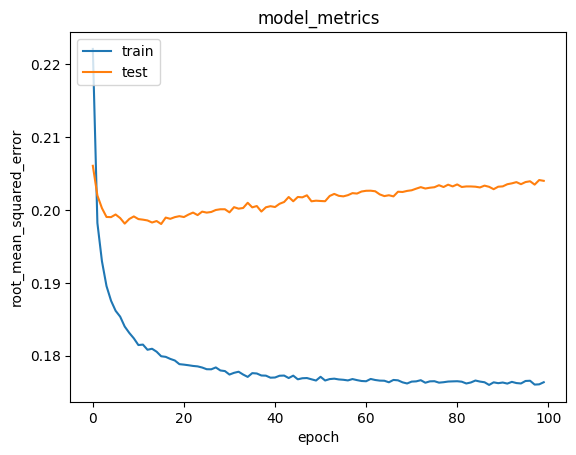

In [67]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Mendapatkan Rekomendasi

In [88]:
movie_df = movie_new
df = pd.read_csv('movie-recommendation-data/ml-latest-small/ratings.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [89]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

47/47 [==============================] - 0s 2ms/step
Showing recommendations for users: 47
Movie with high ratings from user
--------------------------------
Green Mile, The (1999) : Crime|Drama
Whiplash (2014) : Drama
--------------------------------
Top 10 movie recommendation
--------------------------------
Paths of Glory (1957) : Drama|War
Guess Who's Coming to Dinner (1967) : Drama
Two Family House (2000) : Drama
Hope and Glory (1987) : Drama
Lady Jane (1986) : Drama|Romance
Awful Truth, The (1937) : Comedy|Romance
Come and See (Idi i smotri) (1985) : Drama|War
Adam's Rib (1949) : Comedy|Romance
Safety Last! (1923) : Action|Comedy|Romance
Reefer Madness: The Movie Musical (2005) : Comedy|Drama|Musical
